# Example of plotting predictions and ground truth grids

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
from common import voxel_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
base = '../../data/tabletop_results/saved_00208_[531]/'

## Loading in the prediction

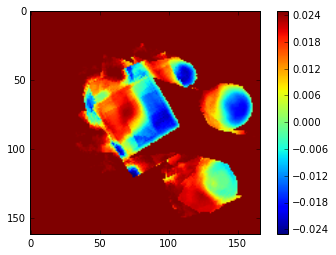

In [27]:
prediction = voxel_data.WorldVoxels.load_from_dat(
    base + 'short_and_tall_samples_no_segment.dat',
    base + 'short_and_tall_samples_no_segment_meta.yaml')
plt.imshow(prediction.V[:, :, 20])
plt.clim(-0.025, 0.025)
plt.colorbar();

## Loading in the Zheng baseline

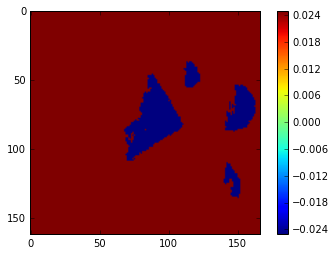

In [38]:
prediction = voxel_data.WorldVoxels.load_from_dat(base + 'zheng_3.dat', base + 'zheng_3.yaml')
plt.imshow(prediction.V[:, :, 20])
plt.clim(-0.025, 0.025)
plt.colorbar();

## Loading in the ground truth

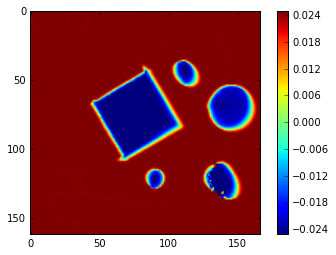

In [28]:
ground_truth = voxel_data.WorldVoxels.load_from_dat(
    base + 'ground_truth.dat', base + 'ground_truth_meta.yaml')
plt.imshow(ground_truth.V[:, :, 20])
plt.clim(-0.025, 0.025)
plt.colorbar();

# Converting to mesh

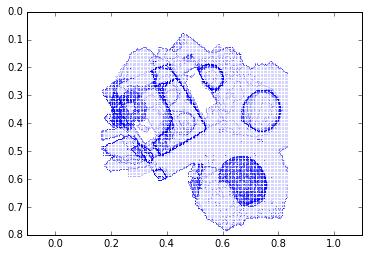

In [37]:
from common import mesh
ms = mesh.Mesh()
ms.from_volume(prediction)

# optionally - save to file
# ms.write_to_obj('filename.obj')

# vertices in this mesh are in world coordinates, so we 
# can plot this axis-aligned and scale will be correct
plt.plot(ms.vertices[:, 1], ms.vertices[:, 0], '.', ms=0.2)
plt.gca().invert_yaxis()
plt.axis('equal');